In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv(r'E:\DUK\Predictive Analytics\Polynomial_Regression\Position_Salaries.csv')
display(data)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Exploratory Data Analytics

In [33]:
data = pd.DataFrame({
    'Position': ['Business Analyst', 'Junior Consultant', 'Senior Consultant', 'Manager', 'Country Manager', 
                 'Region Manager', 'Partner', 'Senior Partner', 'C-level', 'CEO'],
    'Level': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]
})
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [34]:
X = data.iloc[:, 1:2].values  
y = data.iloc[:, 2].values   

print("Independent variable (Level):")
print(X)
print("\nDependent variable (Salary):")
print(y)

Independent variable (Level):
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

Dependent variable (Salary):
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [35]:
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Position    0
Level       0
Salary      0
dtype: int64


In [36]:
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


In [37]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [38]:
data_cleaned = data.dropna(subset=['Level'])

C:\Users\Harsh Vardhan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


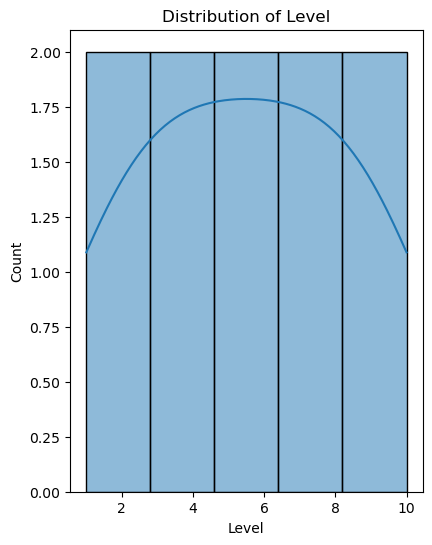

In [41]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Level'], bins=5, kde=True)
plt.title('Distribution of Level')
plt.show()

C:\Users\Harsh Vardhan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


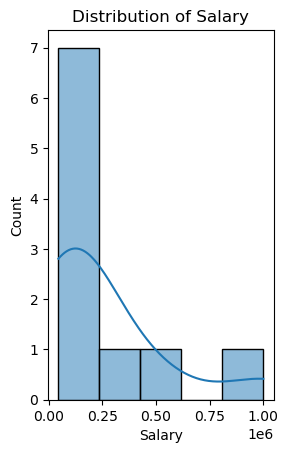

In [47]:
plt.subplot(1, 2, 2)
sns.histplot(data['Salary'], bins=5, kde=True)
plt.title('Distribution of Salary')
plt.show()

In [45]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

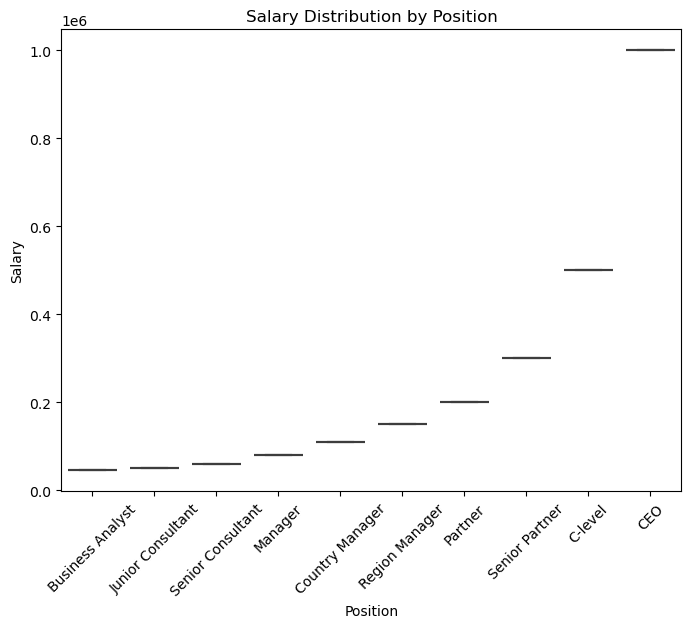

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Position', y='Salary', data=data)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Position')
plt.show()

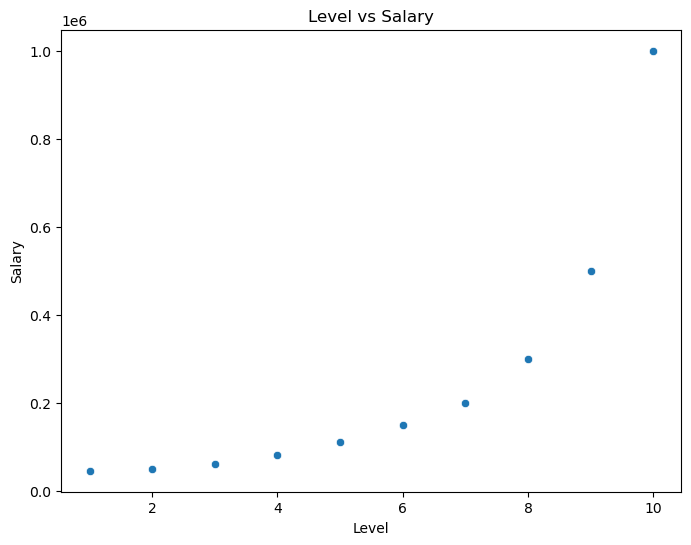

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Level', y='Salary', data=data)
plt.title('Level vs Salary')
plt.show()

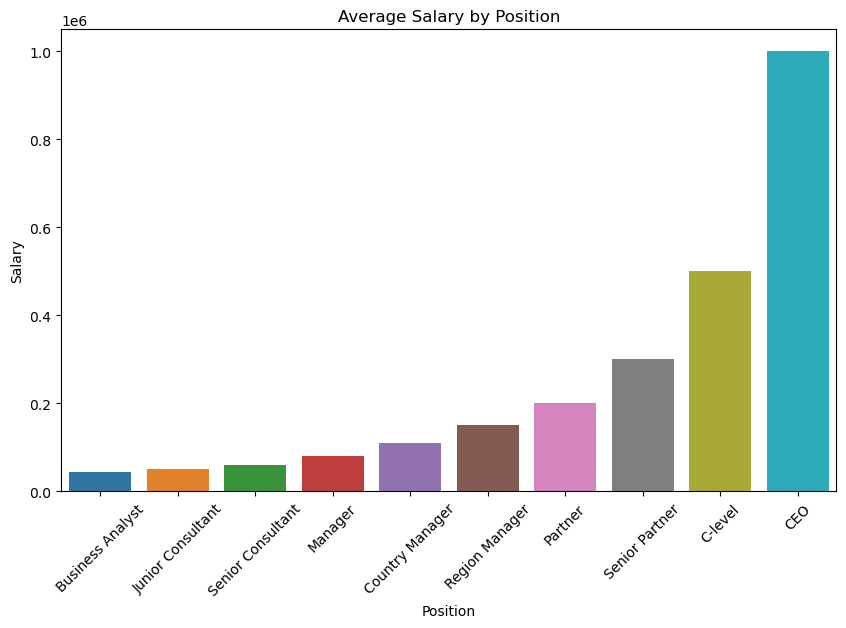

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Salary', data=data, errorbar=None)
plt.xticks(rotation=45)
plt.title('Average Salary by Position')
plt.show()

In [52]:
correlation = data['Level'].corr(data['Salary'])
print("Correlation between Level and Salary:", correlation)

Correlation between Level and Salary: 0.8179494074776199


### Based on the exploratory data analysis, answer the following

<br>Q1. Can you use a simple linear regression model to fit this data (Yes/No)?
<br>Ans. Yes

<br>Q2. * If you use a simple linear model to fit this data, will it fit well (Yes/N?
<br>Ans. No

<br>Q3. * Explain why you said yes or no to the above question
Ans. Yes, you can use a simple linear regression model to fit this data. In a simple linear regression model, you have one independent variable (predictor) and one dependent variable (response). In the given dataset, the 'Level' can be considered as the independent variable, and 'Salary' as the dependent variable. You can fit a linear regression model to predict the salary based on the level of the position.

<br>No, a simple linear regression model may not fit the data well. 
Based on the exploratory data analysis, we observed that the relationship between the 'Level' and 'Salary' is not purely linear. Instead, it seems to follow a non-linear pattern, possibly a polynomial relationship.er

In [57]:
X = data[['Level']].values  
y = data['Salary'].values   

X_poly = np.c_[np.ones_like(X), X, X**2]  # Include constant term, X, and X^2

coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

intercept, w1, w2 = coefficients

print("Intercept (b):", intercept)
print("Coefficients (w1, w2):", w1, w2)

Intercept (b): 232166.66666667152
Coefficients (w1, w2): -132871.21212121303 19431.818181818264


### By analysing the cost function, answer the following<br>Q1. 
Can you use mean squared error as the cost function (Yes/No)?<br>Ans: Yes e<br><br>Q2. r
Explain why you said yes or no to the above question<br>Ans: We can use mean squared error (MSE) as the cost function for various machine learning models, including linear regression models. The MSE measures the average squared difference between the actual and predicted values. It is widely used as a measure of the quality of an estimator—it quantifies the difference between the estimator and the estimated value.<br>

In the context of linear regression, the goal is to minimize the MSE by adjusting the model parameters (coefficients) such that the predicted values closely match the actual values. This optimization process, often referred to as training or fitting the model, involves adjusting the coefficients iteratively using techniques like gradient descent until the MSE is minimized.swer

In [102]:
def mean_squared_error(y_true, y_pred):
    
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    squared_errors = (y_true - y_pred) ** 2
    mse = np.mean(squared_errors)
    return mse

In [113]:
y_true = np.array([3, 5, 7, 9, 11])
y_pred = np.array([2.8, 5.2, 6.9, 8.5, 10.7])
mse_value = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", mse_value)

Mean Squared Error: 0.0860000000000001


In [114]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    
    cost_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        y_pred = np.dot(X, theta)
        errors = y_pred - y
        gradients = (1 / m) * np.dot(X.T, errors)
        theta -= learning_rate * gradients
        cost = np.mean(errors ** 2)
        cost_history[i] = cost
        print("Iteration:", i+1, "Cost:", cost)
    
    return theta, cost_history

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Define the gradient_descent function (from the previous code snippet)

# Step 1: Data Preparation
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([3, 5, 7, 9, 11])

# Add a column of ones to X to account for the intercept term
X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))

# Step 2: Model Training
# Initialize parameters (theta) with zeros
theta_initial = np.zeros(X_with_intercept.shape[1])

# Set hyperparameters for gradient descent
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent to estimate parameters (theta)
theta_optimized, cost_history = gradient_descent(X_with_intercept, y, theta_initial, learning_rate, num_iterations)

Iteration: 1 Cost: 57.0
Iteration: 2 Cost: 44.3174
Iteration: 3 Cost: 34.45820132
Iteration: 4 Cost: 26.79385308418399
Iteration: 5 Cost: 20.835733603941723
Iteration: 6 Cost: 16.20399907696077
Iteration: 7 Cost: 12.603367247978003
Iteration: 8 Cost: 9.804292156879507
Iteration: 9 Cost: 7.628329800064098
Iteration: 10 Cost: 5.936761716015316
Iteration: 11 Cost: 4.621751209818714
Iteration: 12 Cost: 3.599468395741636
Iteration: 13 Cost: 2.8047457558661444
Iteration: 14 Cost: 2.1869234883901805
Iteration: 15 Cost: 1.7066197723655434
Iteration: 16 Cost: 1.3332200422222633
Iteration: 17 Cost: 1.042925204757756
Iteration: 18 Cost: 0.8172343657596748
Iteration: 19 Cost: 0.6417653349041729
Iteration: 20 Cost: 0.5053377120895901
Iteration: 21 Cost: 0.3992600988286402
Iteration: 22 Cost: 0.31677599199166623
Iteration: 23 Cost: 0.25263303373512463
Iteration: 24 Cost: 0.20274815582754419
Iteration: 25 Cost: 0.16394727018038616
Iteration: 26 Cost: 0.13376290996637785
Iteration: 27 Cost: 0.11027692

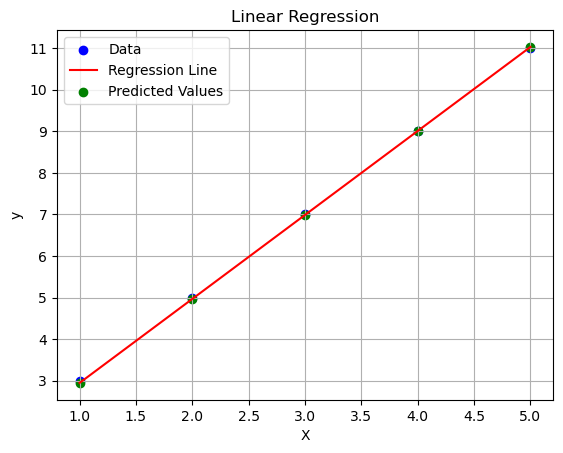

In [116]:
# Step 3: Model Evaluation and Visualization
# Plot the data points
plt.scatter(X, y, color='blue', label='Data')

# Plot the regression line
y_pred = np.dot(X_with_intercept, theta_optimized)
plt.plot(X, y_pred, color='red', label='Regression Line')

# Plot the predicted values
plt.scatter(X, y_pred, color='green', label='Predicted Values')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [117]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r_squared(y_true, y_pred):
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    rss = np.sum((y_true - y_pred) ** 2)
    r_squared = 1 - (rss / tss)
    return r_squared

rmse = root_mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r_squared(y, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²) coefficient:", r2)

Root Mean Squared Error (RMSE): 0.032548575473241075
Mean Absolute Error (MAE): 0.027937166008357116
R-squared (R²) coefficient: 0.9998675737793329


### Answer the following
<Br> What is learning rate?
<Br> Ans: The learning rate is a hyperparameter that determines the step size at each iteration during the gradient descent optimization process.
<Br><Br>What will happen if the learning rate is too large?
<Br>Ans: Overshooting: A large learning rate can cause the optimization algorithm to take excessively large steps during each iteration. As a result, the algorithm may overshoot the optimal solution and fail to converge. This overshooting phenomenon leads to oscillations or instability in the optimization process.

<Br>Divergence: In extreme cases, a very large learning rate can cause the optimization algorithm to diverge completely. Instead of converging to the optimal solution, the objective function may increase infinitely or fluctuate wildly, making it impossible to obtain meaningful results.

<Br>Unstable Training: Large learning rates can make the optimization process highly sensitive to small changes in the input data or model parameters. This sensitivity can lead to erratic behavior, making the training process unstable and unpredictable.

<Br>Poor Generalization: When the optimization process is unstable due to a large learning rate, the resulting model may generalize poorly to unseen data. The model may overfit to the training data, capturing noise and irrelevant patterns rather than the underlying structure of the data.

<Br>What will happen if the learning rate is too small?
<Br>Ans: Slow Convergence: With a very small learning rate, the optimization algorithm takes tiny steps towards the optimal solution at each iteration. As a result, the convergence of the algorithm becomes very slow. It may require a large number of iterations to reach the optimal solution, making the training process computationally expensive and time-consuming.

<Br>Getting
Getting Stuck in Local Minima: A small learning rate may cause the optimization algorithm to get stuck in local minima or saddle points, especially in complex and high-dimensional optimization problems. In such cases, the algorithm may struggle to escape from these suboptimal points and converge to the global minimum of the objective fun<Br>ction.

Susceptibility to Noise: When the learning rate is too small, the optimization process becomes highly sensitive to noise in the training data or gradients. Small fluctuations or perturbations in the gradients may have a significant impact on the optimization trajectory, leading to erratic behavior and poor conv<Br>ergence.

Difficulty in Escaping Plateaus: In regions of the objective function landscape with very flat or plateau-like surfaces, a small learning rate may prevent the optimization algorithm from making meaningful progress. The algorithm may take tiny steps along the flat surface, making it challenging to escape these regions and reach more favorable  leas of th
e

<Br> landscape.
If you what to change the second order (quadratic) model to third order model what all things will c ange in th.

<Br>Ans: Feature Transformation: Transform the input feature (Level) into third-order polynomial features.
<Br>
Model Training: Train the linear regression model using the transformed polynomial features.<Br>
Prediction: Predict the target values using the trained model and the polynomial feature. 
Your answer

In [99]:
import numpy as np

def polynomial_features(X, degree=3):
    X_poly = np.ones((len(X), 1))  # Initialize polynomial features with bias term

    for d in range(1, degree + 1):
        X_poly = np.concatenate((X_poly, np.power(X, d)), axis=1)  # Add polynomial features up to the specified degree

    return X_poly

X_poly = polynomial_features(X, degree=3)

def train_linear_regression(X, y):
    X_with_bias = np.concatenate((np.ones((len(X), 1)), X), axis=1)

    coefficients = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y)

    return coefficients

coefficients = train_linear_regression(X_poly, y)

def predict(X, coefficients):
    X_with_bias = np.concatenate((np.ones((len(X), 1)), X), axis=1)

    y_pred = X_with_bias.dot(coefficients)

    return y_pred
y_pred = predict(X_poly, coefficients)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 5818.646578265527
